# Loading data

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.impute import KNNImputer

# to display all plots in google colab
%matplotlib inline
# to see all columns of dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('exoplanets.csv')
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
print(list(df.columns))

['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag']


In [4]:
df.shape

(9564, 50)

In [5]:
# deleting name, id columns since they dont provide logical value to the data.
df = df.drop(columns = ['kepid','kepoi_name','kepler_name','koi_pdisposition','koi_tce_delivname'])
for col in list(df.columns):
  if 'err' in col:
    df = df.drop(columns = [col])

df.columns

Index(['rowid', 'koi_disposition', 'koi_score', 'koi_fpflag_nt',
       'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
       'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad',
       'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

# Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rowid             9564 non-null   int64  
 1   koi_disposition   9564 non-null   object 
 2   koi_score         8054 non-null   float64
 3   koi_fpflag_nt     9564 non-null   int64  
 4   koi_fpflag_ss     9564 non-null   int64  
 5   koi_fpflag_co     9564 non-null   int64  
 6   koi_fpflag_ec     9564 non-null   int64  
 7   koi_period        9564 non-null   float64
 8   koi_time0bk       9564 non-null   float64
 9   koi_impact        9201 non-null   float64
 10  koi_duration      9564 non-null   float64
 11  koi_depth         9201 non-null   float64
 12  koi_prad          9201 non-null   float64
 13  koi_teq           9201 non-null   float64
 14  koi_insol         9243 non-null   float64
 15  koi_model_snr     9201 non-null   float64
 16  koi_tce_plnt_num  9218 non-null   float64


In [7]:
df.describe()

,rowid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
count,9564.000000,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9201.000000,9564.000000,9.201000e+03,9201.000000,9201.000000,9.243000e+03,9201.000000,9218.000000,9201.000000,9201.000000,9201.000000,9564.000000,9564.000000,9563.000000
mean,4782.500000,0.480829,0.188206,0.231598,0.194898,0.120033,75.671358,166.183251,0.735105,5.621606,2.379134e+04,102.891778,1085.385828,7.745737e+03,259.895001,1.243654,5706.823280,4.310157,1.728712,292.060163,43.810433,14.264606
std,2761.033321,0.476928,0.390897,0.421875,0.396143,0.325018,1334.744046,67.918960,3.348832,6.471554,8.224268e+04,3077.639126,856.351161,1.592047e+05,795.806615,0.664573,796.857947,0.432606,6.127185,4.766657,3.601243,1.385448
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,120.515914,0.000000,0.052000,0.000000e+00,0.080000,25.000000,0.000000e+00,0.000000,1.000000,2661.000000,0.047000,0.109000,279.852720,36.577381,6.966000
25%,2391.750000,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,132.761718,0.197000,2.437750,1.599000e+02,1.400000,539.000000,2.015000e+01,12.000000,1.000000,5310.000000,4.218000,0.829000,288.660770,40.777173,13.440000
50%,4782.500000,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,137.224595,0.537000,3.792600,4.211000e+02,2.390000,878.000000,1.416000e+02,23.000000,1.000000,5767.000000,4.438000,1.000000,292.261125,43.677504,14.520000
75%,7173.250000,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,170.694603,0.889000,6.276500,1.473400e+03,14.930000,1379.000000,8.702900e+02,78.000000,1.000000,6112.000000,4.543000,1.345000,295.859160,46.714611,15.322000
max,9564.000000,1.000000,1.000000,1.000000,1.000000,1.000000,129995.778400,1472.522306,100.806000,138.540000,1.541400e+06,200346.000000,14667.000000,1.094755e+07,9054.700000,8.000000,15896.000000,5.364000,229.908000,301.720760,52.336010,20.003000


In [8]:
df.dropna(subset = ["koi_impact", "koi_tce_plnt_num", "koi_kepmag"], inplace = True)

In [9]:
df.shape

(8945, 23)

In [10]:
df.isnull().sum()

rowid                 0
koi_disposition       0
koi_score           951
koi_fpflag_nt         0
koi_fpflag_ss         0
koi_fpflag_co         0
koi_fpflag_ec         0
koi_period            0
koi_time0bk           0
koi_impact            0
koi_duration          0
koi_depth             0
koi_prad              0
koi_teq               0
koi_insol             0
koi_model_snr         0
koi_tce_plnt_num      0
koi_steff             0
koi_slogg             0
koi_srad              0
ra                    0
dec                   0
koi_kepmag            0
dtype: int64

In [11]:
df.koi_disposition.unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [12]:
# koi disposition class contains whether the body is idenitified as a exoplanet or not therefore it is to be predicted

# TODO: check what to do with koi_pdisposition and koi_tce_delivname
X = df.drop(columns = ['koi_disposition'])
y = df.koi_disposition

# encoding values of y since it type object for ML we need values as numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [13]:
X.head()

,rowid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,1,1.000,0,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,1.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,2,0.969,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,2.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,3,0.000,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3,1.0,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,4,0.000,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,1.0,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,5,1.000,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,1.0,6031.0,4.438,1.046,288.75488,48.226200,15.509


## **PLOTS**

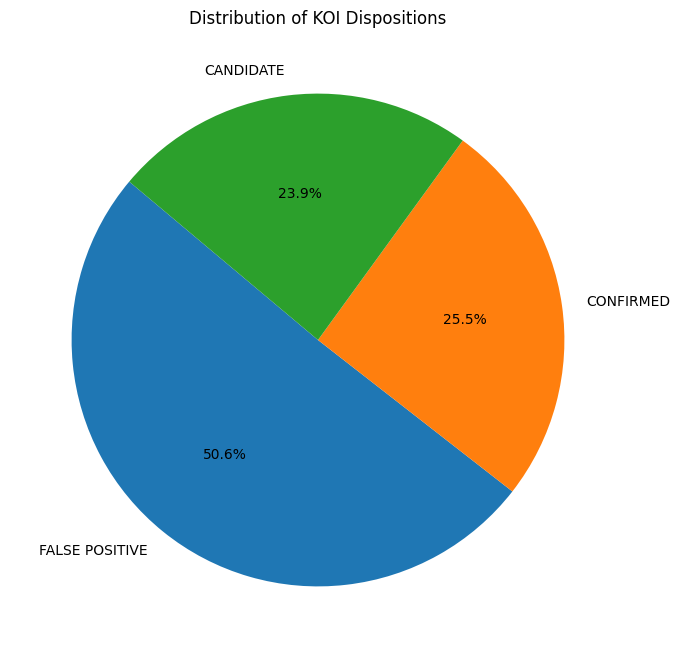

In [14]:
disposition_counts = df['koi_disposition'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(disposition_counts, labels=disposition_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of KOI Dispositions')
plt.show()

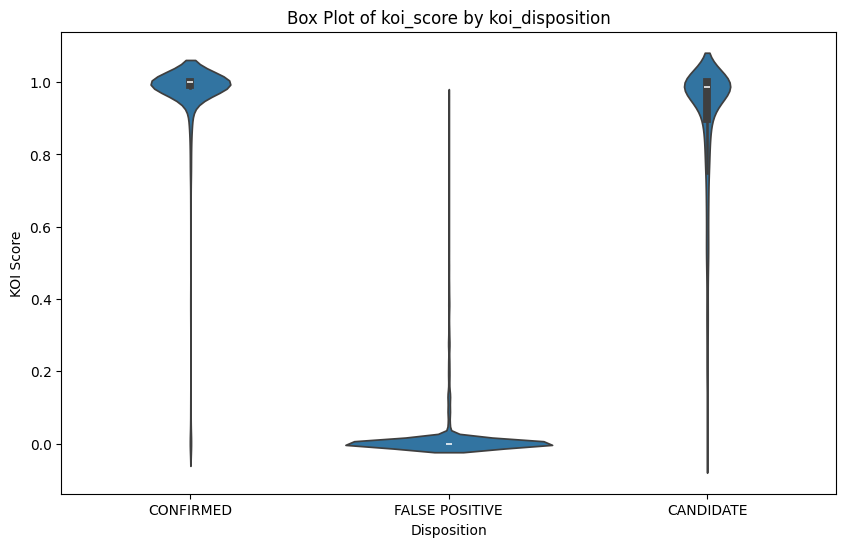

In [15]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="koi_disposition", y="koi_score", data=df)
plt.title('Box Plot of koi_score by koi_disposition')
plt.xlabel('Disposition')
plt.ylabel('KOI Score')
plt.show()

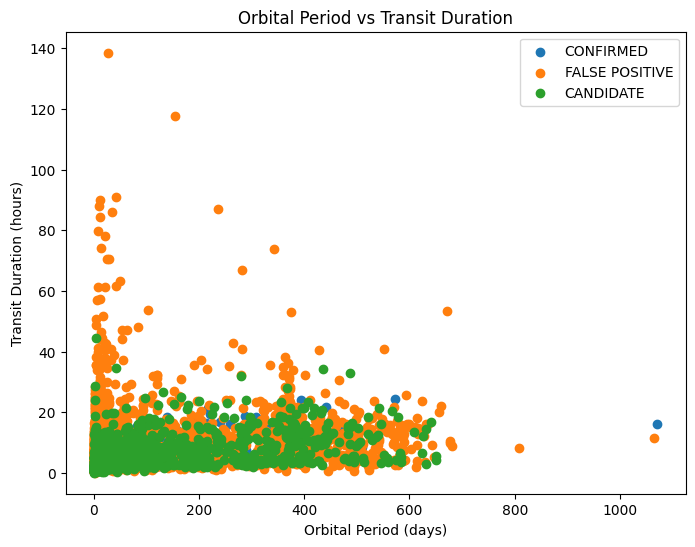

In [16]:
plt.figure(figsize=(8, 6))
for disposition in df['koi_disposition'].unique():
    subset = df[df['koi_disposition'] == disposition]
    plt.scatter(subset['koi_period'], subset['koi_duration'], label=disposition)
plt.title('Orbital Period vs Transit Duration')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Transit Duration (hours)')
plt.legend()
plt.show()

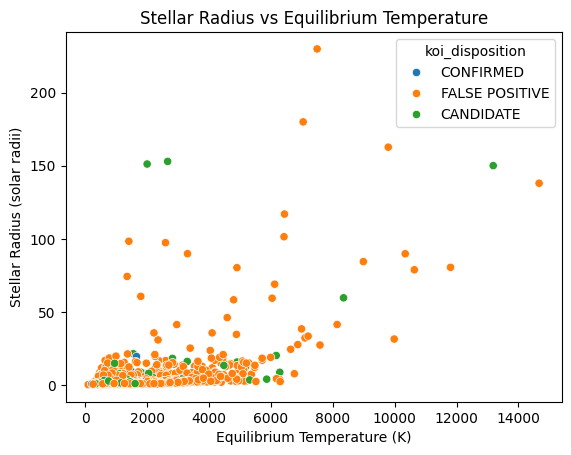

In [17]:
## Stellar Radius vs Equilirium temp
sns.scatterplot(y="koi_srad", x = "koi_teq", data = df,hue = "koi_disposition")
plt.title('Stellar Radius vs Equilibrium Temperature')
plt.xlabel('Equilibrium Temperature (K)')
plt.ylabel('Stellar Radius (solar radii)')
plt.show()

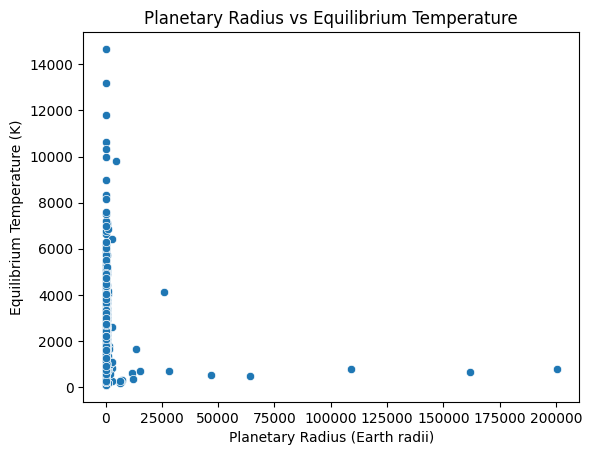

In [18]:
## Planetary Radius vs Equilirium temp
sns.scatterplot(x="koi_prad", y = "koi_teq", data = df)
plt.title('Planetary Radius vs Equilibrium Temperature')
plt.xlabel('Planetary Radius (Earth radii)')
plt.ylabel('Equilibrium Temperature (K)')
plt.show()

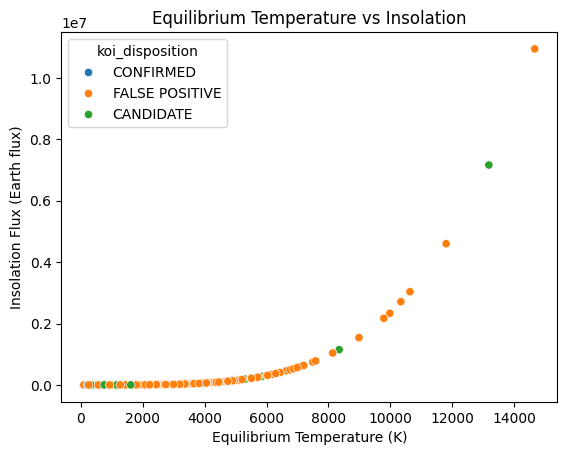

In [19]:
sns.scatterplot(x="koi_teq", y = "koi_insol", data = df,hue="koi_disposition")
plt.title('Equilibrium Temperature vs Insolation')
plt.xlabel('Equilibrium Temperature (K)')
plt.ylabel('Insolation Flux (Earth flux)')
plt.show()

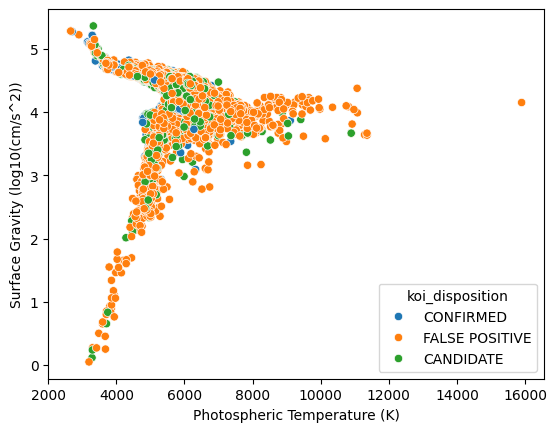

In [20]:
## How the photospheric temperature of the star affects the acc due to gravity
sns.scatterplot(y="koi_slogg", x = "koi_steff", data = df,hue = 'koi_disposition')
plt.xlabel('Photospheric Temperature (K)')
plt.ylabel('Surface Gravity (log10(cm/s^2))')
plt.show()

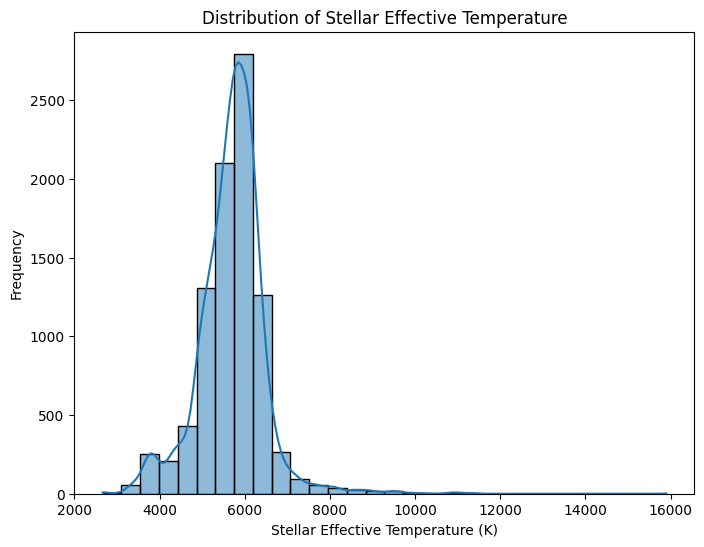

In [21]:
# distribution of stellar effective temperature
plt.figure(figsize=(8, 6))
sns.histplot(x='koi_steff', data=df, bins=30, kde=True)
plt.title('Distribution of Stellar Effective Temperature')
plt.xlabel('Stellar Effective Temperature (K)')
plt.ylabel('Frequency')
plt.show()

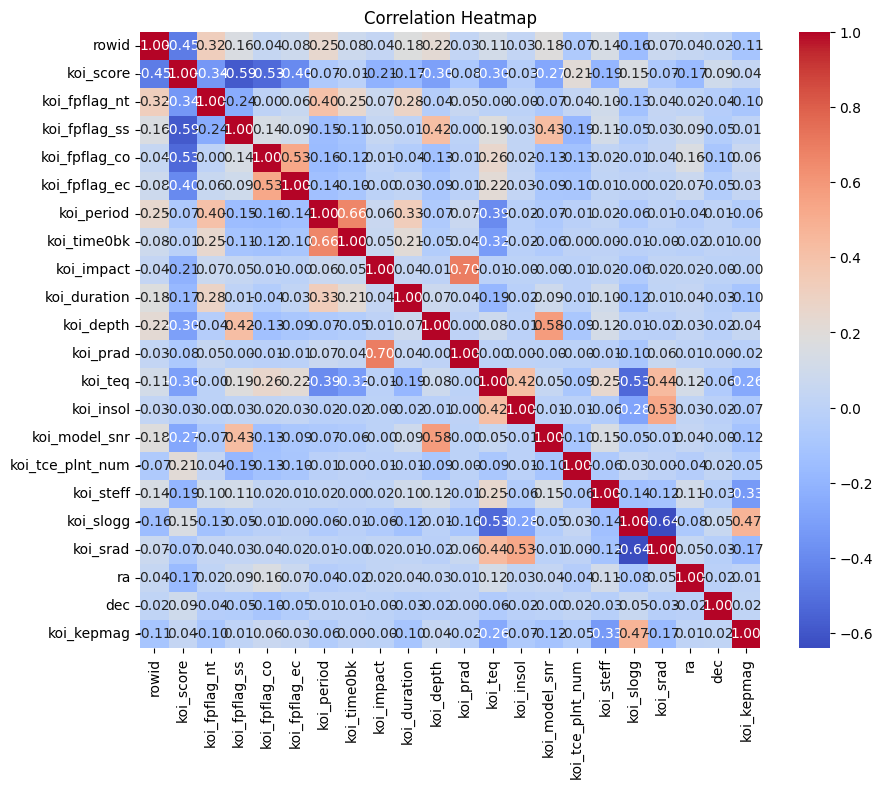

In [22]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
df_numerical = df.select_dtypes(include = [np.number])
correlation_matrix = df_numerical.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [23]:
# filling missing values with knn

imputer = KNNImputer(n_neighbors = 3)

X_imputer = imputer.fit_transform(X)

In [24]:
X_imputer = pd.DataFrame(X_imputer)
X_imputer.columns

RangeIndex(start=0, stop=22, step=1)

#### train test split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_imputer, y,random_state=42,test_size = 0.3)

In [26]:
X_train.shape

(6261, 22)

In [27]:
!pip install imblearn --ignore-installed scikit-learn
print(imblearn.__version__)

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached scikit_learn-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Using cached imbalanced_learn-0.12.2-py3-none-any.whl (257 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached scipy-1.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


NameError: name 'imblearn' is not defined

In [28]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7a6a64b73eb0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7a6a64b73eb0>
Traceback (most recent call last

#### sclaing data

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train_res)
X_test = sc.transform(X_test)

##### PCA

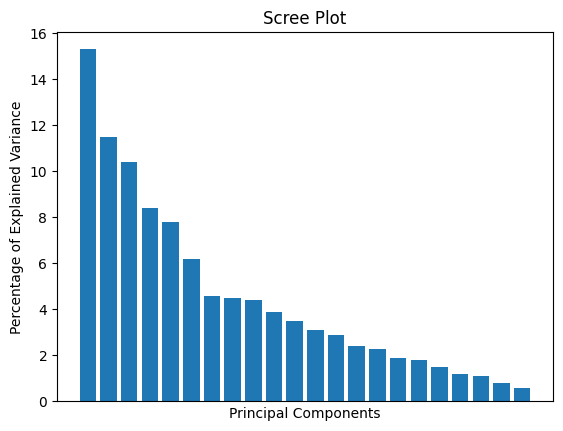

In [30]:
pca = PCA()
X_pca = pca.fit_transform(X_train)

per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = [str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1),height = per_var)
plt.tick_params(
    axis = 'x',
    which = 'both',
    bottom = False,
    top = False,
    labelbottom = False)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [31]:
X_pca_test = pca.transform(X_test)

In [32]:
print(per_var)

[15.3 11.5 10.4  8.4  7.8  6.2  4.6  4.5  4.4  3.9  3.5  3.1  2.9  2.4
  2.3  1.9  1.8  1.5  1.2  1.1  0.8  0.6]


##### LDA

In [33]:
lda = LDA()
X_lda_train = lda.fit_transform(X_train, y_train_res)
X_lda_test = lda.transform(X_test)

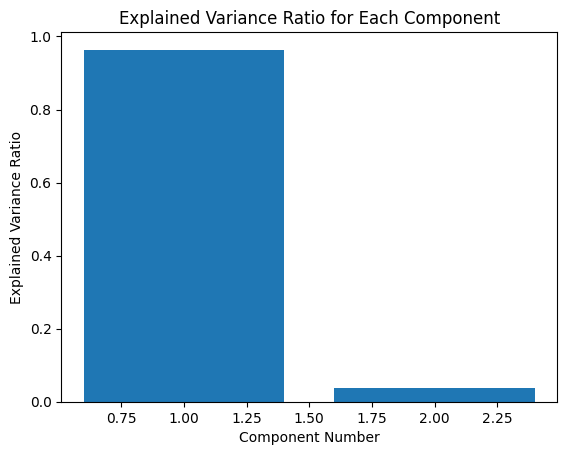

In [34]:
explained_variance_ratio = lda.explained_variance_ratio_

# Visualize the explained variance ratio
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Component')
plt.show()

#### QDA

In [35]:
# Create a QDA classifier
from sklearn.metrics import accuracy_score
qda = QDA()

# Train the classifier
qda.fit(X_train, y_train_res)

# Make predictions
y_pred = qda.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)


Accuracy:  0.7447839046199702


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# ML Algos

In [36]:
!pip install tpot

In [37]:
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score

tpot = TPOTClassifier(generations = 5, population_size = 20, random_state = 42, verbosity = 2)
tpot.fit(X_train,y_train_res)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9286846275752773

Generation 2 - Current best internal CV score: 0.9293185419968305

Generation 3 - Current best internal CV score: 0.9356576862123613

Generation 4 - Current best internal CV score: 0.9356576862123613

Generation 5 - Current best internal CV score: 0.9356576862123613

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.5, max_depth=7, min_child_weight=1, n_estimators=100, n_jobs=1, subsample=0.4, verbosity=0)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

In [38]:
y_pred = tpot.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8994038748137109


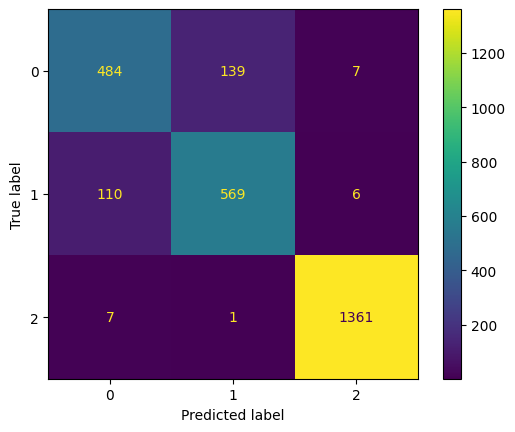

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=tpot.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                       display_labels = tpot.classes_)

disp.plot()
plt.show()

In [40]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, tpot.predict_proba(X_test),multi_class = 'ovo')
print(f'ROC-AUC Score (One V/s One): {roc_auc:.4f}')

roc_auc = roc_auc_score(y_test, tpot.predict_proba(X_test),multi_class = 'ovr')
print(f'ROC-AUC Score (One V/s All): {roc_auc:.4f}')

ROC-AUC Score (One V/s One): 0.9574
ROC-AUC Score (One V/s All): 0.9704


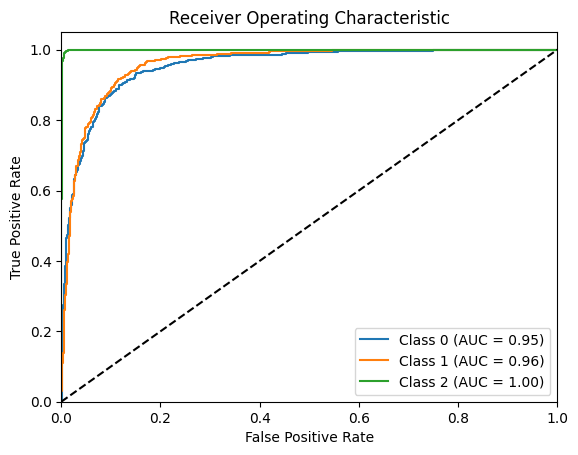

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score,auc
import matplotlib.pyplot as plt

# Assume y_test and tpot.predict_proba(X_test) are your data
y_pred_proba = tpot.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
   fpr[i], tpr[i], _ = roc_curve(y_test==i, y_pred_proba[:, i])
   roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
for i in range(len(np.unique(y_test))):
   plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [42]:
best_pipeline = tpot.fitted_pipeline_
best_model = best_pipeline.steps[-1][1]

# Print the best model
print("Best Model:")
print(best_model)

Best Model:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=1,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [43]:
best_params = best_pipeline.get_params()

# Print all hyperparameters and their values
for param, value in best_params.items():
    print(f"{param}: {value}")

memory: None
steps: [('xgbclassifier', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=1,
              num_parallel_tree=None, objective='multi:softprob', ...))]
verbose: False
xgbclassifier: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, e

### Checking best parametrs for svc

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = [{'C':[0.5,1],
               'gamma' : ['scale',1,0.1,0.01,0.001],
               'kernel' : ['rbf']
              }]
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,
    scoring = 'accuracy',
    verbose=0
)
optimal_params.fit(X_train, y_train_res)
print(optimal_params.best_params_)

# training the dataset with voting classifier


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Define the Logistic Regression model
lr = LogisticRegression()

# Define the GBoost model with specified parameters
gb_classifier = GradientBoostingClassifier(learning_rate=1.0, max_depth=8, max_features=0.05,
                           min_samples_leaf=17, min_samples_split=10,
                           random_state=42)

# Define the SVC model
svc = SVC(random_state =42, gamma = 1,C = 1,probability=True)

# Create the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('gb', gb_classifier), ('svc', svc)],
    voting='soft',weights = [1,1,1])  # Specify soft voting


In [ ]:
x_pca_train=X_pca[:,:2]

In [ ]:
x_pca_train

In [ ]:
from sklearn.metrics import accuracy_score
voting_clf.fit(x_pca_train, y_train_res)

y_pred = voting_clf.predict(X_pca_test[:,:2])
accuracy = accuracy_score(y_test,y_pred)

print(f"Accuracy: {accuracy}")

In [ ]:
from sklearn.metrics import accuracy_score
voting_clf.fit(X_train, y_train_res)

y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

print(f"Accuracy: {accuracy}")

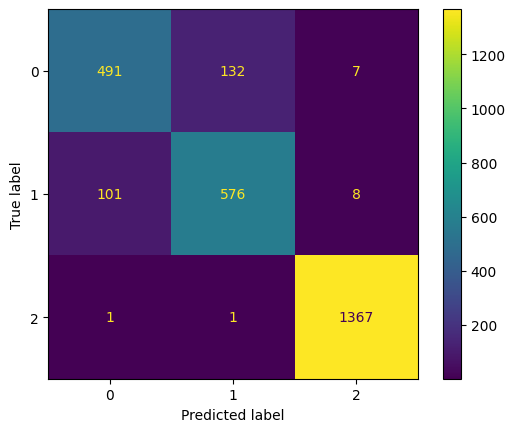

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=voting_clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                       display_labels = voting_clf.classes_)

disp.plot()
plt.show()

In [51]:
roc_auc = roc_auc_score(y_test, voting_clf.predict_proba(X_test),multi_class = 'ovo')
print(f'ROC-AUC Score (One V/s One): {roc_auc:.4f}')

roc_auc = roc_auc_score(y_test, voting_clf.predict_proba(X_test),multi_class = 'ovr')
print(f'ROC-AUC Score (One V/s All): {roc_auc:.4f}')

ROC-AUC Score (One V/s One): 0.9547
ROC-AUC Score (One V/s All): 0.9701


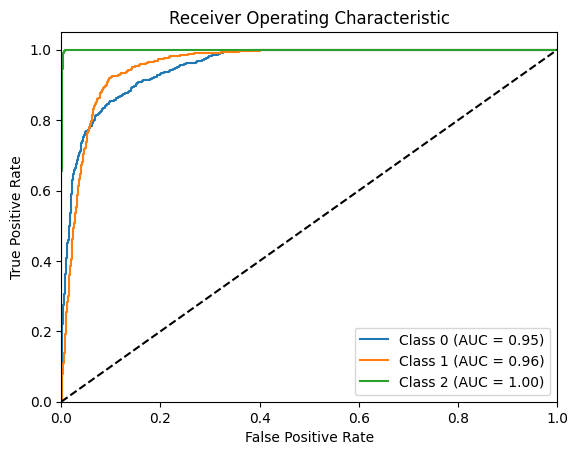

In [52]:
# Assume y_test and tpot.predict_proba(X_test) are your data
y_pred_proba = voting_clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
   fpr[i], tpr[i], _ = roc_curve(y_test==i, y_pred_proba[:, i])
   roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
for i in range(len(np.unique(y_test))):
   plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [54]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto'],
    'bootstrap': [True]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train_res)
print("Best Parameters:", grid_search.best_params_)

best_random_forest = grid_search.best_estimator_

y_pred = best_random_forest.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


ValueError: 
All the 405 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=voting_clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                       display_labels = voting_clf.classes_)

disp.plot()
plt.show()

In [ ]:
roc_auc = roc_auc_score(y_test, best_random_forest.predict_proba(X_test),multi_class = 'ovo')
print(f'ROC-AUC Score (One V/s One): {roc_auc:.4f}')

roc_auc = roc_auc_score(y_test, best_random_forest.predict_proba(X_test),multi_class = 'ovr')
print(f'ROC-AUC Score (One V/s All): {roc_auc:.4f}')

In [ ]:
# Assume y_test and tpot.predict_proba(X_test) are your data
y_pred_proba = best_random_forest.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
   fpr[i], tpr[i], _ = roc_curve(y_test==i, y_pred_proba[:, i])
   roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
for i in range(len(np.unique(y_test))):
   plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()